<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/XOR_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXAMPLE OF AN XOR NETWORK - 2 neurons (input) in layer 1 and 1 neuron (output) in layer 2
See "Helpful Tips" at the end of the notebook

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [32]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [33]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return x

In [34]:
model = XOR()

In [35]:
def weights_init(model):
    print(list(model.modules())) # network from above printed out
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model) # may not be needed but used to show the idea

[XOR(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=1, bias=True)
), Linear(in_features=2, out_features=2, bias=True), Linear(in_features=2, out_features=1, bias=True)]


In [36]:
loss_func = nn.MSELoss()

In [37]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [38]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        
        optimizer.zero_grad()
        y_hat = model(X[data_point])
        loss = loss_func.forward(y_hat, Y[data_point])
        loss.backward()
        optimizer.step()
        
    if i % 500 == 0:
         print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


Epoch: 0, Loss: 0.4696480929851532, 
Epoch: 500, Loss: 0.006183215882629156, 
Epoch: 1000, Loss: 1.2789769243681803e-13, 
Epoch: 1500, Loss: 1.7408297026122455e-13, 
Epoch: 2000, Loss: 0.0, 


In [39]:
model_params = list(model.named_parameters())
print(model_params)
model_params = list(model.parameters()) # used to make below cell better

[('lin1.weight', Parameter containing:
tensor([[-5.0677, -3.7616],
        [-1.5868, -1.4820]], requires_grad=True)), ('lin1.bias', Parameter containing:
tensor([0.4033, 1.6539], requires_grad=True)), ('lin2.weight', Parameter containing:
tensor([[-3.4496,  3.2101]], requires_grad=True)), ('lin2.bias', Parameter containing:
tensor([-0.6267], requires_grad=True))]


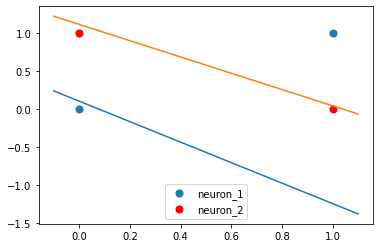

In [40]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

# weights(0,0) and (0,1) are from in the (TO,FROM) format, 
# i.e., to neuron 0(or 1) from input 0(or 1). See Helpful Hints at end
x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

HELPFUL TIPS

>>> x = torch.tensor([[1, 2, 3], [4, 5, 6]])
>>> print(x[1][2])
tensor(6)
>>> x[0][1] = 8
>>> print(x)
tensor([[ 1,  8,  3],
        [ 4,  5,  6]])